## Demonstration of yt

## Sakshee Dhuru: Practical #6

### Importing yt

In [ ]:
!pip install yt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import yt
import numpy as np
import matplotlib.pyplot as plt  #Probably, we don't need this, but it's habit at this point.

### Terminal commands from jupyter notebooks

You can execute terminal commands from jupyter notebooks if you precede the line with !

In [ ]:
!pwd

/content


In [ ]:
!cd output /content/drive/MyDrive

/bin/bash: line 1: cd: too many arguments


###  Now to load in the data file

Define the file name for the snapshot we want to look at.

In [ ]:
fname = "snapshot_000.hdf5"

Tell yt about some parameters for our simulation.

In [ ]:
unit_base = {
    "UnitLength_in_cm": 3.08568e21,
    "UnitMass_in_g": 1.989e43,
    "UnitVelocity_in_cm_per_s": 100000,
}

bbox_lim = 1e5  # kpc

bbox = [[-bbox_lim, bbox_lim], [-bbox_lim, bbox_lim], [-bbox_lim, bbox_lim]]

You can check the values for unit_base by looking in the output/parameters-usedvalues file for your run.  But I think these should work.

Now we load the data.

In [ ]:
ds = yt.load(fname, unit_base=unit_base, bounding_box=bbox)  #Load in the dataset.
ds.index  # Honestly, I am not sure if this is necessary.
ad = ds.all_data()  #Select the full simulation domain to work with.

NameError: ignored

#### Note the difference between ds (the dataset) and ad (a data object that has the full simulation domain).  This is in contrast to selecting a subregion.

This will come up again later.

But for now, let's make a plot!!  

yt : [INFO     ] 2023-11-28 12:24:17,367 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2023-11-28 12:24:17,368 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2023-11-28 12:24:17,369 xlim = -100000.000000 100000.000000
yt : [INFO     ] 2023-11-28 12:24:17,369 ylim = -100000.000000 100000.000000
yt : [INFO     ] 2023-11-28 12:24:17,375 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



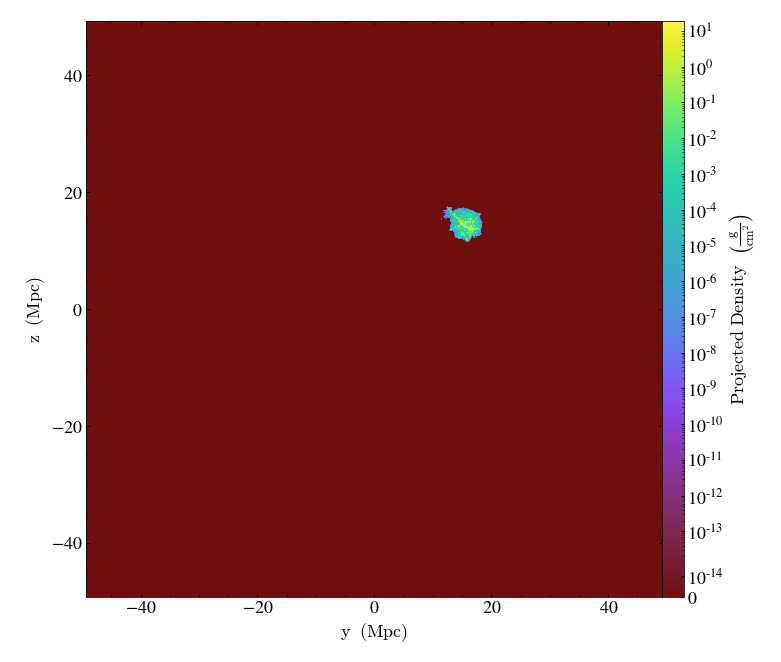

In [ ]:
px = yt.ProjectionPlot(ds, "x", ("gas", "density"))
px.show()

One of the strengths of yt is that we can get to a plot right away!

### Other things you can do with yt

Check what field values you have.

In [ ]:
ds.field_list

[('PartType0', 'ArtificialViscosity'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'Metallicity_11'),
 ('PartType0', 'NeutralHydrogenAbundance'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'StarFormationRate'),
 ('PartType0', 'Velocities'),
 ('PartType1', 'Coordinates'),
 ('PartType1', 'Masses'),
 ('PartType1', 'ParticleIDs'),
 ('PartType1', 'Velocities'),
 ('PartType2', 'Coordinates'),
 ('PartType2', 'Masses'),
 ('PartType2', 'ParticleIDs'),
 ('PartType2', 

In [ ]:
ds.derived_field_list

[('PartType0', 'ArtificialViscosity'),
 ('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'),
 ('PartType0', 'H_p1_density'),
 ('PartType0', 'H_p1_fraction'),
 ('PartType0', 'H_p1_mass'),
 ('PartType0', 'H_p1_number_density'),
 ('PartType0', 'He_metallicity'),
 ('PartType0', 'He_nuclei_density'),
 ('PartType0', 'He_nuclei_mass_density'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Me

And some other parameters of the simulation:

In [ ]:
print("left edge: ", ds.domain_left_edge)
print("right edge: ", ds.domain_right_edge)
print("center: ", ds.domain_center)

left edge:  [-100000. -100000. -100000.] code_length
right edge:  [100000. 100000. 100000.] code_length
center:  [0. 0. 0.] code_length


We can also print out the total mass.  Note that we are now using ad instead of ds.

In [ ]:
# total_mass returns a list, representing the total gas and dark matter + stellar mass, respectively
print([tm.in_units("Msun") for tm in ad.quantities.total_mass()])

[unyt_quantity(1.9544932e+13, 'Msun'), unyt_quantity(2.89850983e+16, 'Msun')]


###  Zoom in on a subregion

First, we can figure out where in the box has the highest density:

In [ ]:
density = ad["PartType0", "density"]
wdens = np.where(density == np.max(density))
coordinates = ad["PartType0", "Coordinates"]
center = coordinates[wdens][0]
print("center = ", center)

center =  [31995.63476562 31473.6640625  28969.88671875] code_length


Set up a box to zoom into, using the location of thie highest density as the center:

In [ ]:
new_box_size = ds.quan(250, "code_length")

left_edge = center - new_box_size / 2
right_edge = center + new_box_size / 2

print(new_box_size.in_units("Mpc"))
print(left_edge.in_units("Mpc"))
print(right_edge.in_units("Mpc"))

0.12315295332038365 Mpc
[15.69985118 15.44272225 14.20933195] Mpc
[15.82300414 15.5658752  14.3324849 ] Mpc


Now we can define a new sub-region with yt that is smaller box centered on the region of highest density.

In [ ]:
ad2 = ds.region(center=center, left_edge=left_edge, right_edge=right_edge)

We can print the total mass of our subregion as well!

In [ ]:
print([tm.in_units("Msun") for tm in ad2.quantities.total_mass()])

[unyt_quantity(2.72364232e+11, 'Msun'), unyt_quantity(2.52337044e+12, 'Msun')]


Finally, we can plot just the zoomed in region!

yt : [INFO     ] 2023-11-28 12:28:05,717 xlim = 31348.664062 31598.664062
yt : [INFO     ] 2023-11-28 12:28:05,717 ylim = 28844.886719 29094.886719
yt : [INFO     ] 2023-11-28 12:28:05,719 xlim = 31348.664062 31598.664062
yt : [INFO     ] 2023-11-28 12:28:05,720 ylim = 28844.886719 29094.886719
yt : [INFO     ] 2023-11-28 12:28:05,723 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



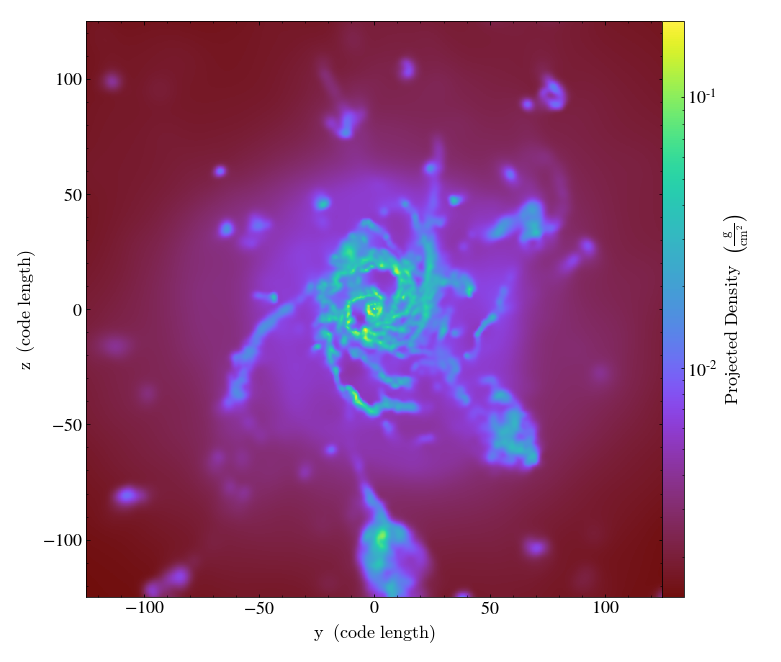

In [ ]:
px = yt.ProjectionPlot(ds, "x", ("gas", "density"), center=center, width=new_box_size)
px.show()

### Some other plots!

(I haven't polished the following plots and they may not be the best options for this exact simulation. However, this should give you some ideas for what you can do with yt.)

Try a temperature slice plot.

yt : [INFO     ] 2023-11-28 12:28:32,559 xlim = 31348.664062 31598.664062
yt : [INFO     ] 2023-11-28 12:28:32,559 ylim = 28844.886719 29094.886719
yt : [INFO     ] 2023-11-28 12:28:32,560 xlim = 31348.664062 31598.664062
yt : [INFO     ] 2023-11-28 12:28:32,560 ylim = 28844.886719 29094.886719
yt : [INFO     ] 2023-11-28 12:28:32,561 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



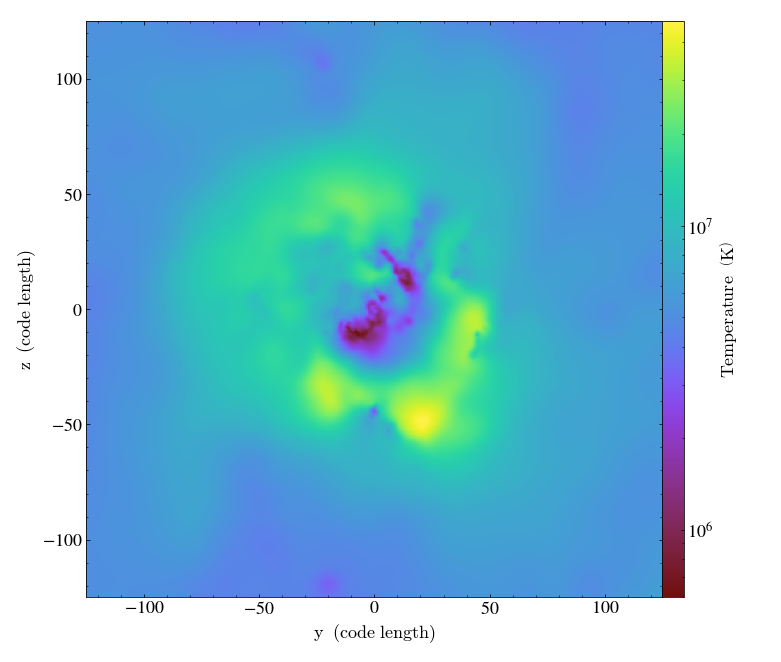

In [ ]:
sx = yt.SlicePlot(ds, "x", ("gas", "temperature"), center=center, width=new_box_size)
sx.show()

*Or* a gas velocity plot:

yt : [INFO     ] 2023-11-28 12:28:54,480 xlim = 31348.664062 31598.664062
yt : [INFO     ] 2023-11-28 12:28:54,481 ylim = 28844.886719 29094.886719
yt : [INFO     ] 2023-11-28 12:28:54,481 xlim = 31348.664062 31598.664062
yt : [INFO     ] 2023-11-28 12:28:54,481 ylim = 28844.886719 29094.886719
yt : [INFO     ] 2023-11-28 12:28:54,483 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800



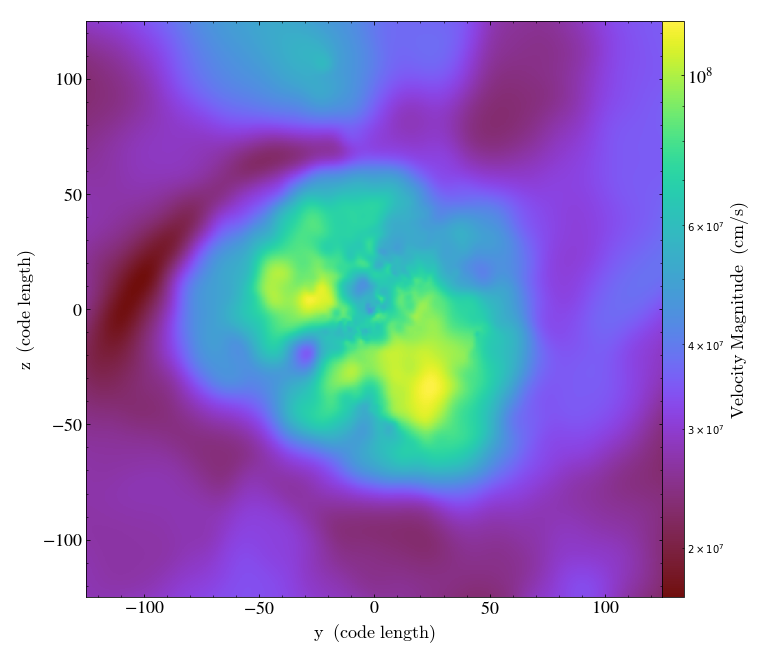

In [ ]:
sx = yt.SlicePlot(ds, "x", ("gas", "velocity_magnitude"), center=center, width=new_box_size)
sx.show()

We can also change the orientation of the slice!

In [ ]:
sy = yt.SlicePlot(ds, "y", ("gas", "density"), center=center, width=new_box_size)
sy.show()

NameError: ignored

What about adding velocity arrows?  Or temperature contours?

In [ ]:
px = yt.ProjectionPlot(ds, "x", ("gas", "density"), center=[45, 45, 0.5], width=new_box_size)
px.annotate_velocity()
px.show()

NameError: ignored

In [ ]:
px = yt.ProjectionPlot(ds, "x", ("gas", "density"), center=center, width=new_box_size)
px.annotate_contour(("gas", "temperature"))


NameError: ignored

In [ ]:
#px.show()

How about a profile plot? (Note that you can pick which fields you plot against each other.)

In [ ]:
prof = yt.ProfilePlot(ds, ("gas", "x"), ("gas", "temperature"), weight_field=None)


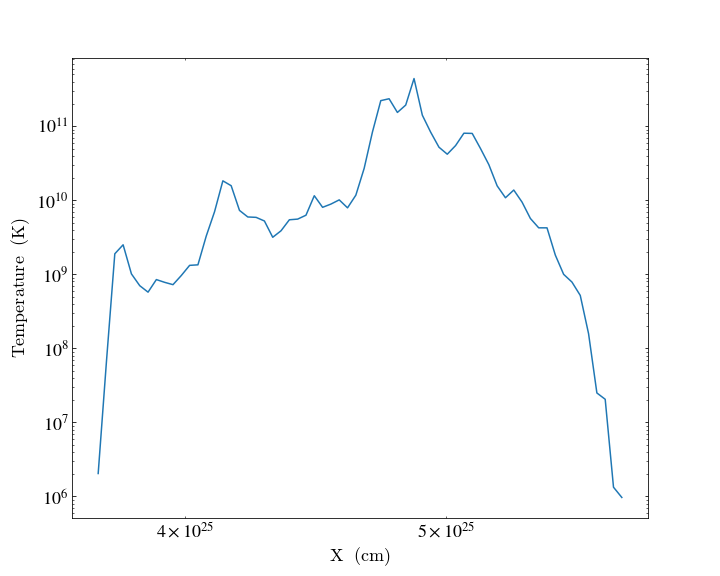

In [ ]:
prof.show()

###  You can also extract the arrays to work with directly.

This gives you a list of every density in the selected region (e.g., ad vs. ad2):

In [ ]:
ad['gas', 'density']

unyt_array([1.65418811e-26, 6.91311444e-26, 1.06099853e-25, ...,
            1.14500062e-29, 7.91774592e-30, 3.82404802e-30], 'g/cm**3')

This is now an array you can work with similarly to a numpy array!

In [ ]:
np.max(ad['gas', 'density'])

unyt_quantity(4.15344071e-21, 'g/cm**3')

(array([4.32973e+06, 3.69100e+03, 7.31000e+02, 2.77000e+02, 8.00000e+01,
        2.50000e+01, 1.00000e+01, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.01621944e+01, 1.31325549e+07, 2.62650897e+07, 3.93976244e+07,
        5.25301592e+07, 6.56626939e+07, 7.87952287e+07, 9.19277634e+07,
        1.05060298e+08, 1.18192833e+08, 1.31325368e+08]),
 <BarContainer object of 10 artists>)

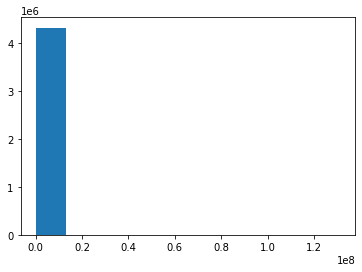

In [ ]:
plt.hist(ad['gas', 'temperature'].value)

# show particle data


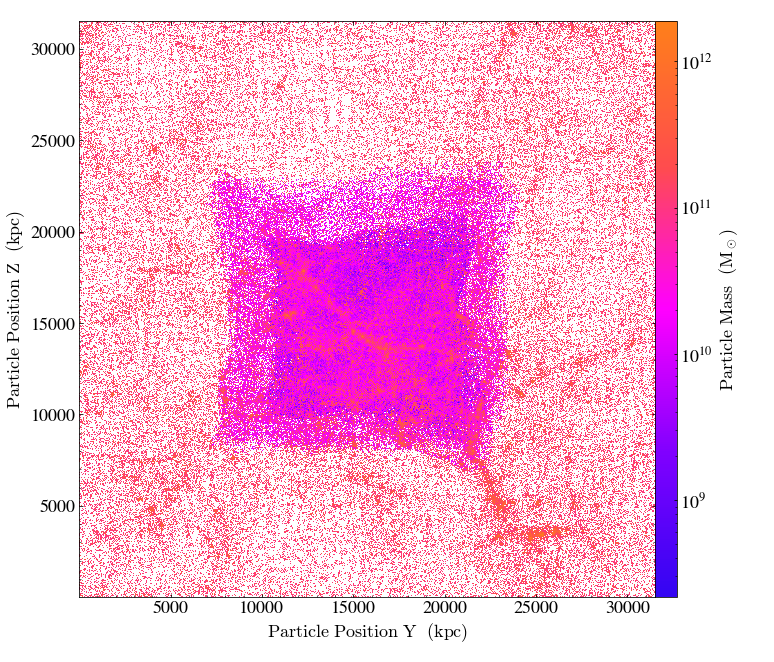

In [ ]:
cm = yt.make_colormap([([0.2,0.02,0.95], 10), ([0.5,0,1], 10), ([1,0,1], 10),([1,0.3,0.3],10),([1,0.5,0.1],0)],
p = yt.ParticlePhasePlot(
    ds,
    ("all", "particle_position_y"),
    ("all", "particle_position_z"),
    ("all", "particle_mass"),
)

p.set_unit(("all", "particle_mass"), "Msun")
p.set_unit(("all", "particle_position_y"), "kpc")
p.set_unit(("all", "particle_position_z"), "kpc")
cm = yt.make_colormap([([0.2,0.02,0.95], 10), ([0.5,0,1], 10), ([1,0,1], 10),([1,0.3,0.3],10),([1,0.5,0.1],0)],
    name="colorss",
    interpolate=True,)
p.set_cmap(field=("all", "particle_mass"), cmap="colorss")

p.show()